<a href="https://colab.research.google.com/github/Prateek-Poonia/Unsupervised-Machine-Learning/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


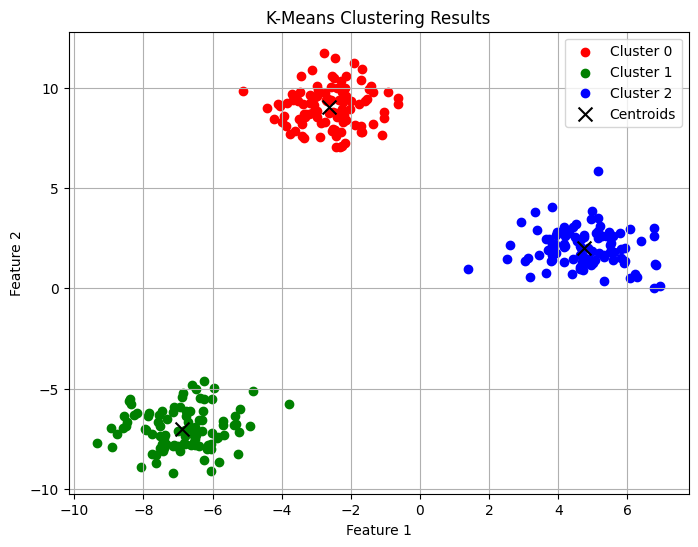

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic datasets
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

points, true_labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# KMeans clustering using sklearn
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(points)  # Correct method to fit the model

# Cluster centers and labels
final_centers = kmeans.cluster_centers_
final_clusters = kmeans.labels_

# Plotting the results
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']

# Plot each cluster
for i in range(n_clusters):
    cluster_points = points[final_clusters == i]  # Use final_labels, not final_clusters
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i}')

# Plot cluster centers
plt.scatter(final_centers[:, 0], final_centers[:, 1], marker='x', color='black', s=100, label='Centroids')

plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


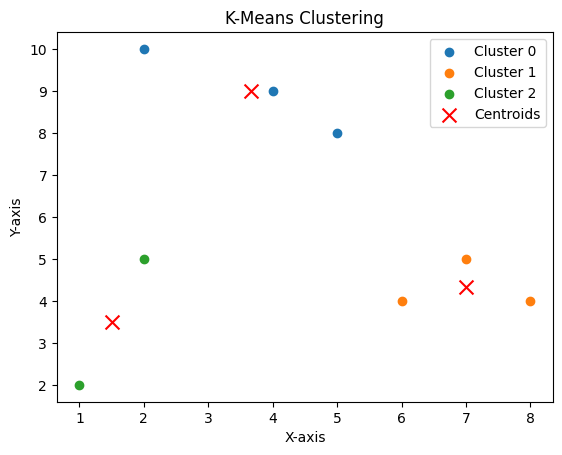

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
initial_centers = np.array([[2, 10], [5, 8], [1, 2]])

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Function to assign points to the nearest cluster center
def assign_points_to_clusters(points, centers):
    clusters = []
    for point in points:
        distances = [euclidean_distance(point, center) for center in centers]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

# Function to update the cluster centers
def update_centers(points, clusters, k):
    new_centers = []
    for i in range(k):
        cluster_points = points[np.array(clusters) == i]
        if len(cluster_points) > 0:
            new_center = cluster_points.mean(axis=0)
        else:
            new_center = initial_centers[i]
        new_centers.append(new_center)
    return np.array(new_centers)

# Function to check if clusters have converged
def has_converged(old_centers, new_centers):
    return np.array_equal(old_centers, new_centers)

# Number of clusters
k = 3

# K-means clustering algorithm
def k_means(points, initial_centers, k):
    centers = initial_centers.copy()
    clusters = assign_points_to_clusters(points, centers)
    converged = False

    while not converged:
        new_centers = update_centers(points, clusters, k)
        converged = has_converged(centers, new_centers)
        centers = new_centers
        clusters = assign_points_to_clusters(points, centers)

    return centers, clusters

# Run k-means
final_centers, final_clusters = k_means(points, initial_centers, k)

# Plotting
for i in range(k):
    cluster_points = points[np.array(final_clusters) == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
#plt.scatter(points[:, 0], points[:, 1], c=final_clusters, cmap='viridis')
plt.scatter(final_centers[:, 0], final_centers[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering')
plt.legend()

plt.show()


Que. given points A1(2,10), A2(2,5) A3(8,4) B1(5,8) B2(7,5), B3(6,4) C1(1,2) C2(4,9)
initial centroids are A1,B1,C1

Now USing KMeans Library


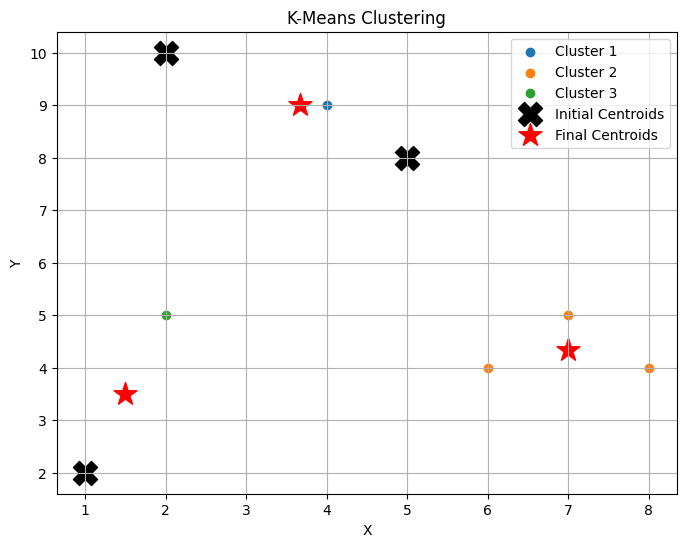

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data points
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Initial clusters
initial_centers = np.array([[2, 10], [5, 8], [1, 2]])

# Number of clusters
k = 3

# KMeans clustering
kmeans = KMeans(n_clusters=k, init=initial_centers, n_init=1, random_state=42)
kmeans.fit(points)

# Cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting
plt.figure(figsize=(8, 6))

# Plot each cluster
for i in range(k):
    cluster_points = points[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

# Plot the initial centroids
plt.scatter(initial_centers[:, 0], initial_centers[:, 1], s=300, c='black', marker='X', label='Initial Centroids')

# Plot the final centroids
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='*', label='Final Centroids')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


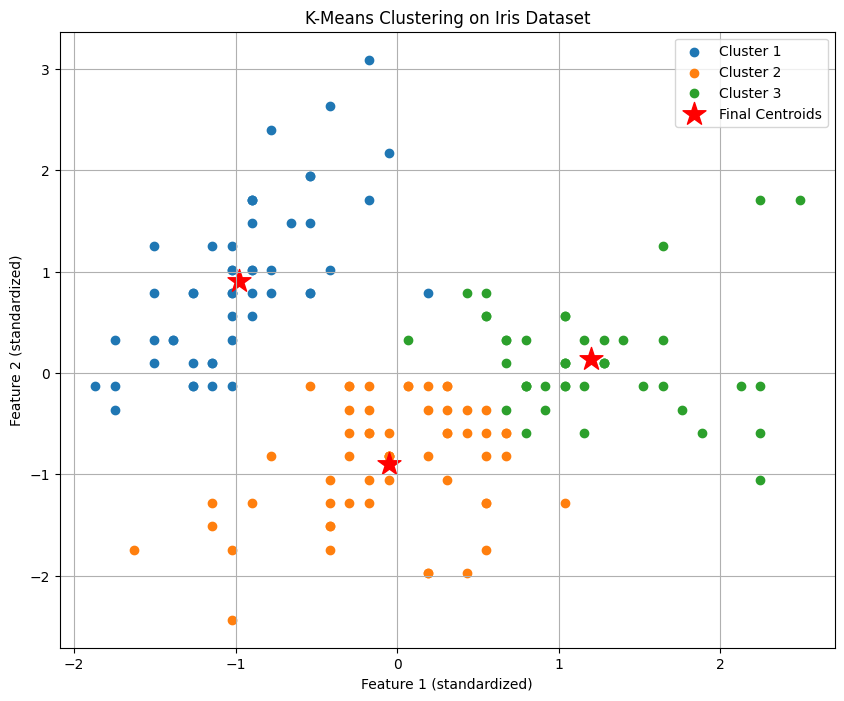

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Use only the first two features for visualization purposes
X = data[:, :2]  # Sepal length and sepal width

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of clusters
k = 3

# KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting
plt.figure(figsize=(10, 8))

# Plot each cluster
for i in range(k):
    cluster_points = X_scaled[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

# Plot the final centroids
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='*', label='Final Centroids')

plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


ELBOW METHOD


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

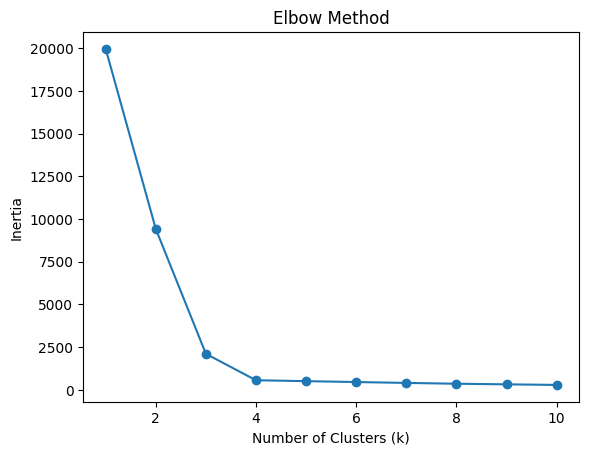

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # Import make_blobs
import matplotlib.pyplot as plt

X,y = make_blobs(n_samples=300, centers=4, random_state=42)

inertia = []
k_range = range(1,11)
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
#initialize  and fot kmeans